
# Задание к лекции 04-1: Линейная регрессия 1

Name: Шведова Софья

Email: shvedovass@mgpu.ru




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [1]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

Создадим список, где будут храниться дозы и создадим переменную food, где сложим все дозы


In [2]:
doses = [0, 2.5, 5]
food = food_consump_dose0 + food_consump_dose2p5 + food_consump_dose5
dose = np.repeat(doses, 8)

Создадим датафрейм

In [3]:
data = pd.DataFrame({'Dose': dose, 'Food': food})

Посмотрим созданный датафрейм

In [4]:
data

,Dose,Food
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6
5,0.0,93.0
6,0.0,106.6
7,0.0,108.3
8,2.5,73.3
9,2.5,84.8


Построим диаграмму рассеивания

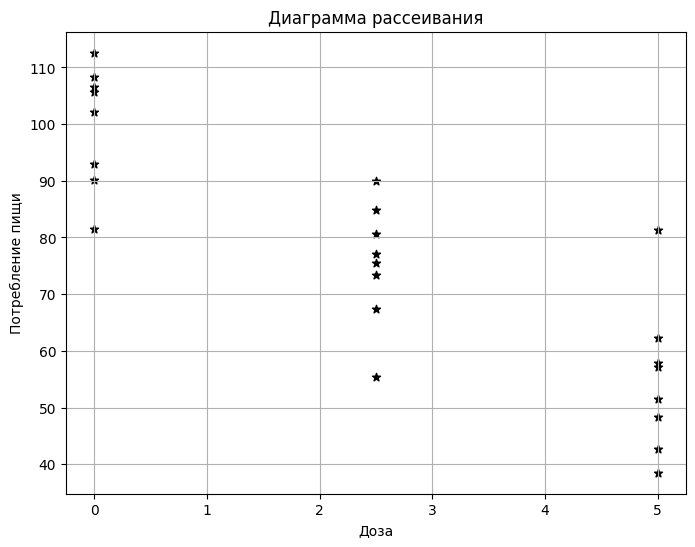

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Dose'], data['Food'],c='k',marker='*')
plt.xlabel('Доза')
plt.ylabel('Потребление пищи')
plt.title('Диаграмма рассеивания')
plt.grid(True)

Описательная статистика

In [6]:
data.describe()

,Dose,Food
count,24.000000,24.000000
mean,2.500000,76.812500
std,2.085144,21.842685
min,0.000000,38.500000
25%,0.000000,57.700000
50%,2.500000,78.900000
75%,5.000000,90.900000
max,5.000000,112.600000


Узнаем R-squared

In [7]:
foood = sm.ols(formula="Dose ~ Food", data=data).fit()
foood.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dose   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           7.27e-08
Time:                        11:20:41   Log-Likelihood:                -35.044
No. Observations:                  24   AIC:                             74.09
Df Residuals:                      22   BIC:                             76.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8052      0.828     10.629      0.000       7.087      10.523
Food          -0.0821      0.010     -7.900      0.000      -0.104      -0.061
==============================================================================
Omnibus:                        2.704   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                1.202
Skew:                           0.328   Prob(JB):                        0.548
Kurtosis:                       3.878   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Эта модель описывает 74% потребления пищи:
- $R^2 = 74\%$ изменчивости данных учитывается моделью.
- Значение $p$ для F-статистики очень мало.
- Значения $p$ для отдельных коэффициентов малы.

**Уравнение y=8,8052-0,0821*Food**

Кросс-валидация

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
X = data['Dose'].values.reshape(-1, 1)
y = data['Food'].values

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print('Оценки R^2:', scores)
print('Средняя квадратичная ошибка на кросс-валидации (RMSE):', np.mean(-scores))

Оценки R^2: [-127.78110775  -61.44604894 -154.35351247 -260.08584283  -81.88582908]
Средняя квадратичная ошибка на кросс-валидации (RMSE): 137.11046821226603


Средняя квадратичная ошибка на кросс-валидации (RMSE) равна 137, что довольно высоко, что может указывать на недостаточную точность модели.

Импортируем модуль statsmodels.api и переименовываем его в переменную sm

In [ ]:
import statsmodels.api as sm


`con = sm.add_constant(data['Dose'])` добавляет константу к массиву данных 'Dose';

`don = sm.OLS(data['Food'], con).fit()` создает и обучает модель OLS (Метод наименьших квадратов) с зависимой переменной 'Food' и независимой переменной 'Dose' с константой;

`beta0, beta1 = don.params` возвращает параметры регрессии, где `b0` - это значение константы, а `b1` - это коэффициент наклона регрессионной линии.

In [ ]:
con = sm.add_constant(data['Dose'])
don = sm.OLS(data['Food'], con).fit()
b0, b1 = don.params

Строим график с линией тренда

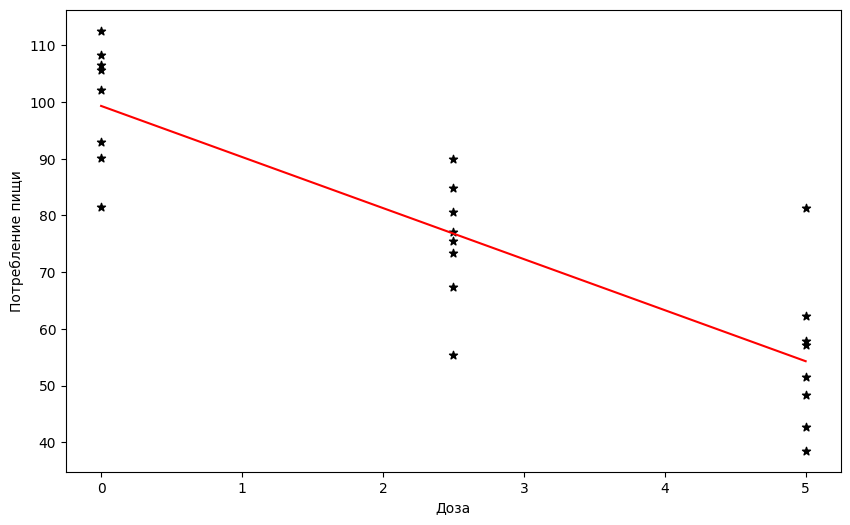

In [ ]:
plt.scatter(x=data['Dose'],y=data['Food'],c='k',marker='*')
plt.plot(data['Dose'], b0 + b1*data['Dose'], color='r')
plt.xlabel('Доза')
plt.ylabel('Потребление пищи')
plt.show()

**Ваш ответ:** R  в квадрате равен 0,739. Я считаю, что переменные не имеют сильной линейной связи

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



Вычисление остатков

In [ ]:
data['Predict'] = don.predict(con)
data['Residual'] = data['Food'] - data['Predict']
print(data['Residual'])

0     13.26875
1      2.76875
2     -9.13125
3    -17.83125
4      6.26875
5     -6.33125
6      7.26875
7      8.96875
8     -3.51250
9      7.98750
10    -9.51250
11   -21.51250
12     3.88750
13    13.18750
14    -1.31250
15     0.28750
16   -15.79375
17    27.00625
18     2.80625
19     8.00625
20    -2.79375
21    -5.99375
22   -11.59375
23     3.60625
Name: Residual, dtype: float64


Строим график с остатками

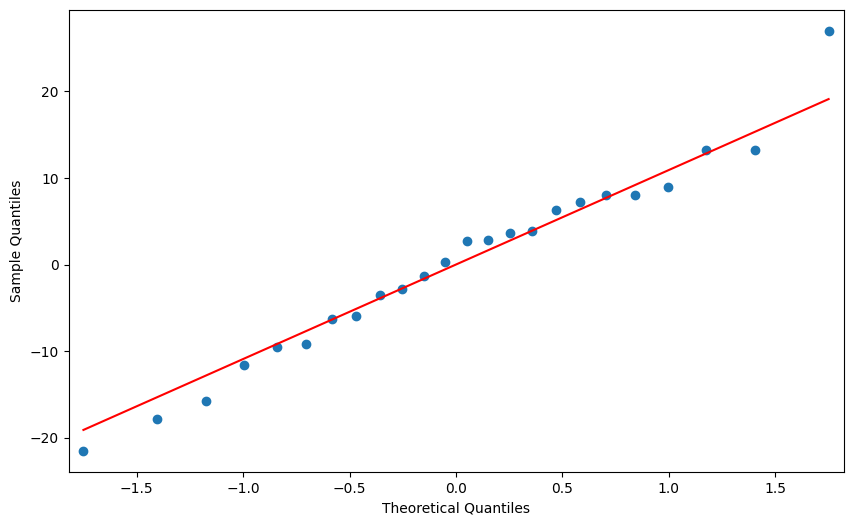

In [ ]:
sm.qqplot(data['Residual'], line='s')
plt.show()

**Ваш ответ:** Я считаю, что они нормально распределены, так как остатки примерно на линии тренда

